# import libraries

In [253]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score


# load heart attack dataset

In [254]:
df = pd.read_csv('Medicaldataset (1).csv')
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB



+# Check for missing or null values

In [256]:
null_values = df.isnull().sum()
null_values

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

# To convert categorical data into numerical data

In [257]:
le = LabelEncoder() 
df['Result'] = le.fit_transform(df['Result'])

In [258]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


<AxesSubplot:>

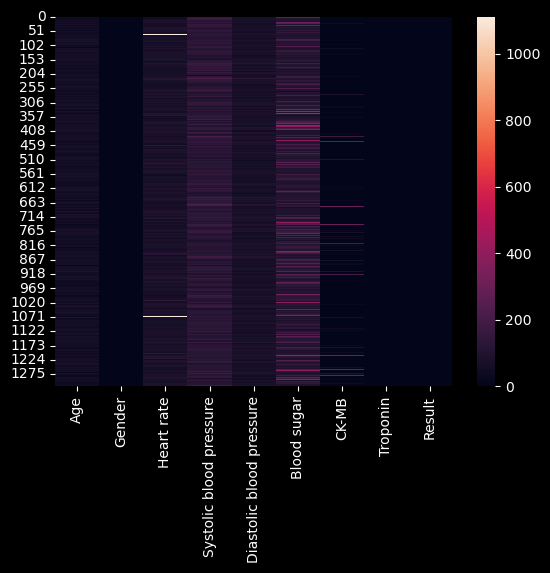

In [259]:
sns.heatmap(df)

# create a count plot using Seaborn

C:\Users\emana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


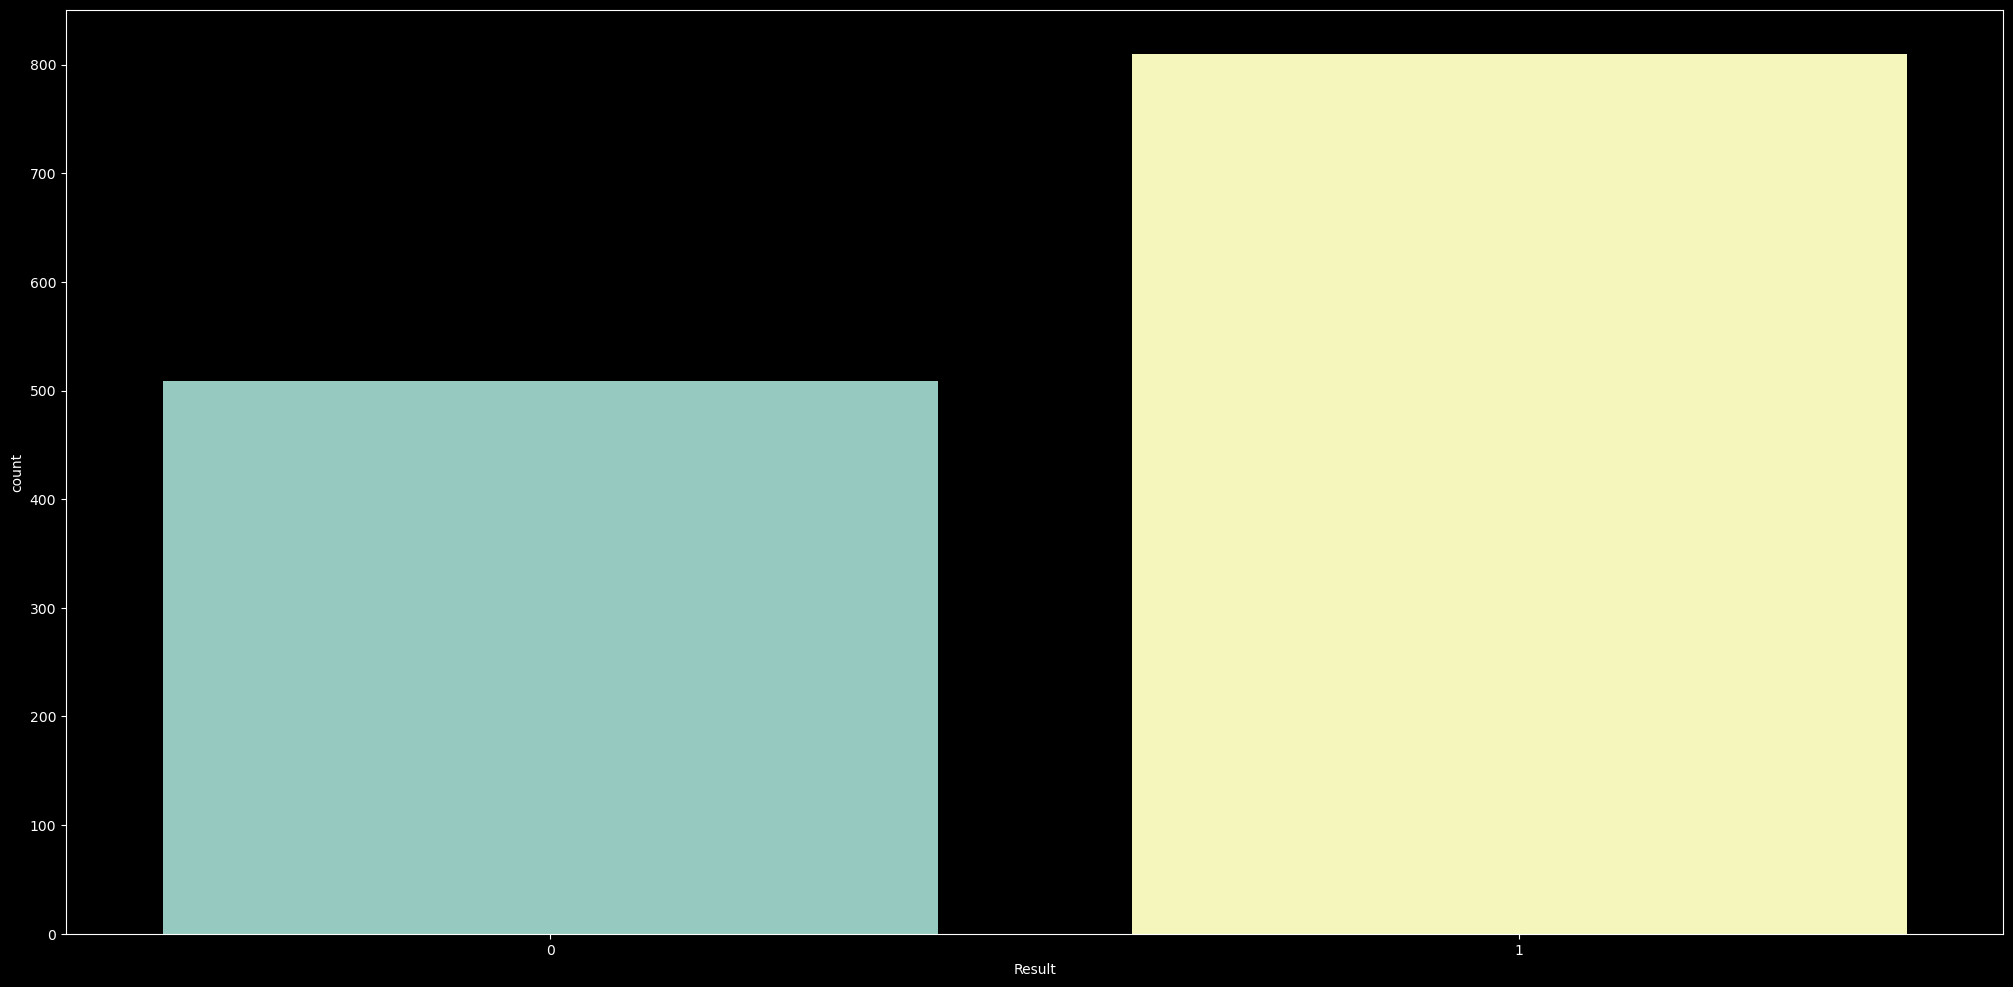

In [260]:
plt.figure(figsize=(25, 12))
sns.countplot(df["Result"])
plt.style.use("dark_background")

In [261]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


<AxesSubplot:ylabel='Count'>

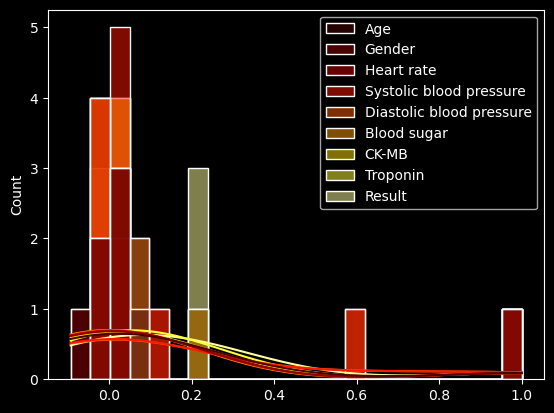

In [262]:
sns.histplot(data=corr,kde=True,palette='hot')

In [263]:
# calculate the quartiles and IQR
q1, q3 = np.percentile(df, [25, 75])
iqr = q3 - q1

# calculate the upper and lower bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


In [264]:
data_array = np.array(df)
data_list = data_array.tolist()


In [265]:
# identify the outliers
outliers = [x for x in data_list if x < lower_bound or x > upper_bound]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

NameError: name 'outliers' is not defined

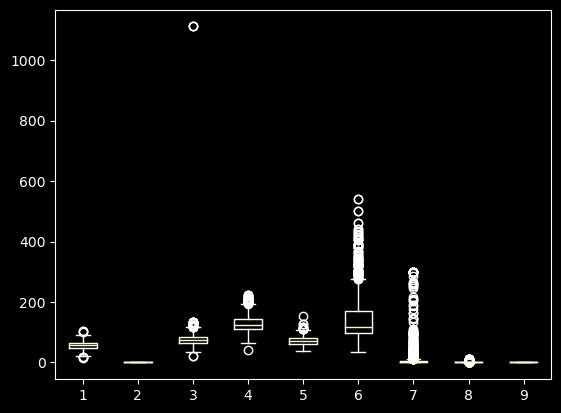

In [266]:
# plot the boxplot
plt.boxplot(data)

# plot the outliers
plt.plot(np.ones(len(outliers)), outliers,'ro')
plt.style.use ("dark_background")

# show the plot
plt.show()




In [267]:
corr=df.corr()
corr

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


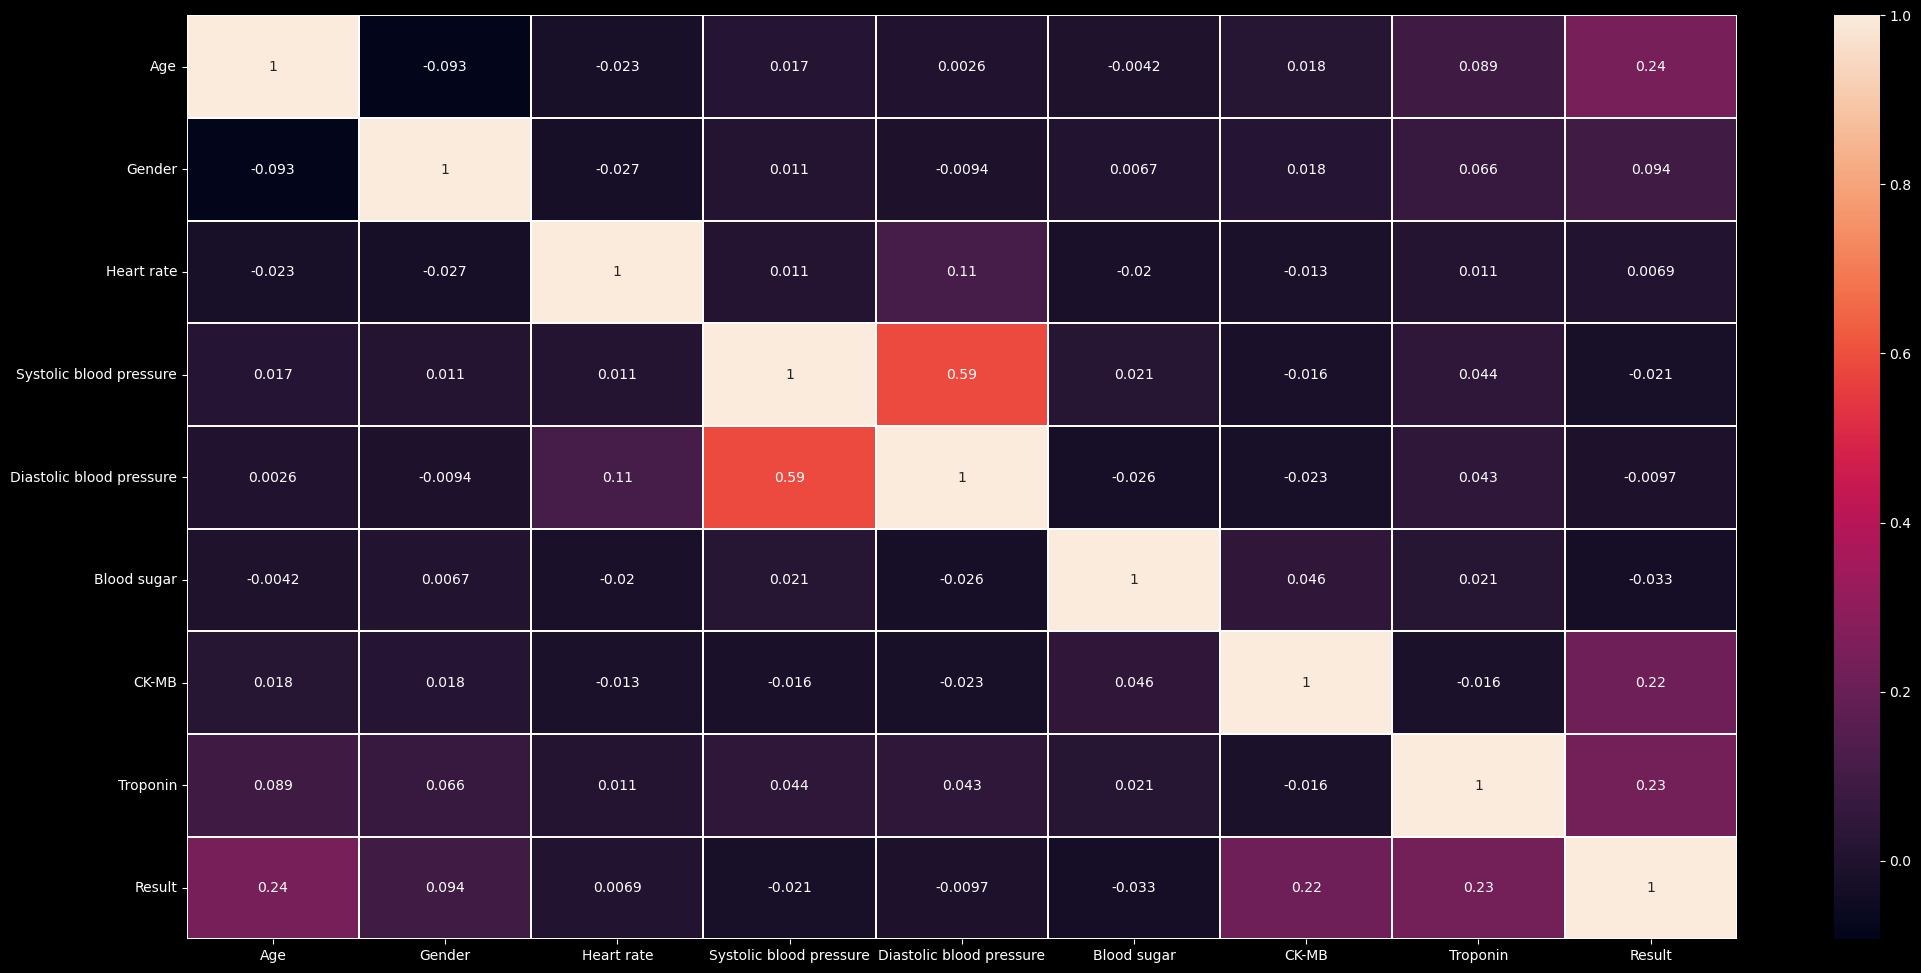

In [268]:
plt.figure(figsize=(25, 12))
corrmat = df.corr().head(20)
top_corr_features = corrmat.index
g=sns.heatmap(df[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

In [269]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target



In [270]:
# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the dataset into training and testing sets

In [271]:
X = df.drop('Result', axis=1)
y = df['Result']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [273]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1055, 8)
Shape of y_train:  (1055,)
Shape of X_test:  (264, 8)
Shape of y_test:  (264,)


In [274]:
# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# perform binary classification using the logistic regression

In [275]:
#lr=LogisticRegression()
#lr.fit(X_train,y_train)
#y_predict=lr.predict(X_test)
#y_predict

In [276]:
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7424242424242424


In [277]:
 #print(classification_report(y_test,y_predict))

# Create randomforestclassifier model

In [278]:
#rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
#rf_model.fit(X_train, y_train)
# make predictions on the testing data
#rf_predictions = rf_model.predict(X_test)

In [279]:
#print("Random Forest Model")
#print(classification_report(y_test, rf_predictions))
#print(confusion_matrix(y_test, rf_predictions))

In [281]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, class_weight="balanced", ccp_alpha=0.01)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9924242424242424


#  Creat DecisionTreeClassifier model



In [242]:
clf = DecisionTreeClassifier()
# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)


In [243]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9962121212121212


# Create  XGBoost classifier

In [244]:
clf = xgb.XGBClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [245]:
#  Make predictions on the testing data
y_pred = clf.predict(X_test)

In [246]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy



0.9962121212121212

In [247]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[111,   1],
       [  0, 152]], dtype=int64)